## Concise: 1: Start and mesh
Author: yanjun zhang, Source from book "Abali - 2017 - Computational Reality" P119

In [1]:
from disc_f import *

# mesh-size, contact area coefficient
mesh_min, mesh_max = 3, 5
c_contact          = 1
# Each time step rotation angular, and acc during lag, 1 is full acc, 0 is no acc.
angular_r          = 22400/2
v_vehicle, c_acc   = 160, 1
z1,z2,z3,z_all     = 20,33,30,8
pad_v_tag          = 32
# calling local functions to get all parameters
(dt, P, g, num_steps, h, radiation, v_angular, Ti, Tm, S_rub_circle, t, rho, c, k, t_brake, 
S_total,) = vehicle_initial (angular_r, v_vehicle, c_contact, c_acc)
print("1: Total braking tims is ", round(sum(dt), 2), "s")
print("2: Total numb steps is ", num_steps)

## here use lots of abbreviation, details are in disc_f
domain, cell_markers, facet_amrkers, mesh_name, mesh_name1, mesh_name2 \
                       = mesh_brake_all(mesh_min,mesh_max,pad_v_tag)
V, T_init, u_n         = initial_u_n(domain, Ti)
fdim, bc, mesh_brake, all_e,xdmf, x_co, y_co, ds, b_con \
                       = mesh_setup(domain, V,mesh_name1,num_steps, \
                         angular_r, mesh_name2, c_contact,z_all,Tm, S_rub_circle)
# Initialize
problem,u,v,f,n_vector = variation_initial(V, T_init,domain, rho, c, b_con,\
                          radiation, h, k, xdmf,dt,ds,u_n, Tm,g,bc);
n,converged = solver_setup_solve(problem,u)
## Visualization of time dependent problem using pyvista
gif_name    = "T-s-{}-d-{}-{}-c-{}-e-{}.gif".format(num_steps, angular_r, mesh_name2, c_contact, all_e)
plotter, sargs, renderer, warped, viridis, grid = plot_gif(V,u,gif_name)
##solve
#num_steps= int( num_steps/2 )
T_array     = solve_heat(Ti, u, num_steps, dt, x_co, y_co, angular_r,t_brake, \
                     domain,S_rub_circle,fdim, rho, c, v, radiation, k, h, \
                     f,Tm,u_n,g, ds, xdmf, b_con,bc,plotter,warped)
csv_name    = "Result_T-s-{}-d-{}-{}-c-{}-e-{}.csv".format(num_steps, angular_r, mesh_name2, c_contact, all_e  )
# got the Temperature data
save_t_T(csv_name, T_array)

DOLFINx version: 0.8.0
Simulation environment setup complete.
1: Total braking tims is  69.79 s
2: Total numb steps is  14
The file 'm-3-5.msh' does not exist, start building:
Info    : Meshing 1D...                                                                                                                 
Info    : [  0%] Meshing curve 4 (Circle)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Circle)
Info    : [ 10%] Meshing curve 7 (Circle)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Circle)
Info    : [ 10%] Meshing curve 10 (Circle)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 20%] Meshing curve 12 (Circle)
Info    : [ 20%] Meshing curve 13 (Line)
Info    : [ 20%] Meshing curve 14 (Line)
Info    : [ 20%] Meshing curve 15 (Circle)
Info    : [ 20%] Meshing curve 16 (Line)
Info    : [ 20%] Meshing curve 17 (Line)
Info    : [ 20%] Meshing curve 18 (Line)
Info    : [ 30%] Meshing curve 19 (Line)
Info    : [ 30%] Meshin

Info    : [ 10%] Meshing surface 5 (Cylinder, Frontal-Delaunay)
Info    : [ 10%] Meshing surface 6 (Plane, Frontal-Delaunay)
Info    : [ 10%] Meshing surface 7 (Plane, Frontal-Delaunay)
Info    : [ 10%] Meshing surface 8 (Cylinder, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 9 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 10 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 11 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 12 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 13 (Cylinder, Frontal-Delaunay)
Info    : [ 30%] Meshing surface 14 (Cylinder, Frontal-Delaunay)
Info    : [ 30%] Meshing surface 15 (Cylinder, Frontal-Delaunay)
Info    : [ 30%] Meshing surface 16 (Cylinder, Frontal-Delaunay)
Info    : [ 30%] Meshing surface 17 (Cylinder, Frontal-Delaunay)
Info    : [ 40%] Meshing surface 18 (Cylinder, Frontal-Delaunay)
Info    : [ 40%] Meshing surface 19 (Cylinder, Frontal-Delaunay)
Info    : [ 40%] Meshing surface 20 (Cylinder, F

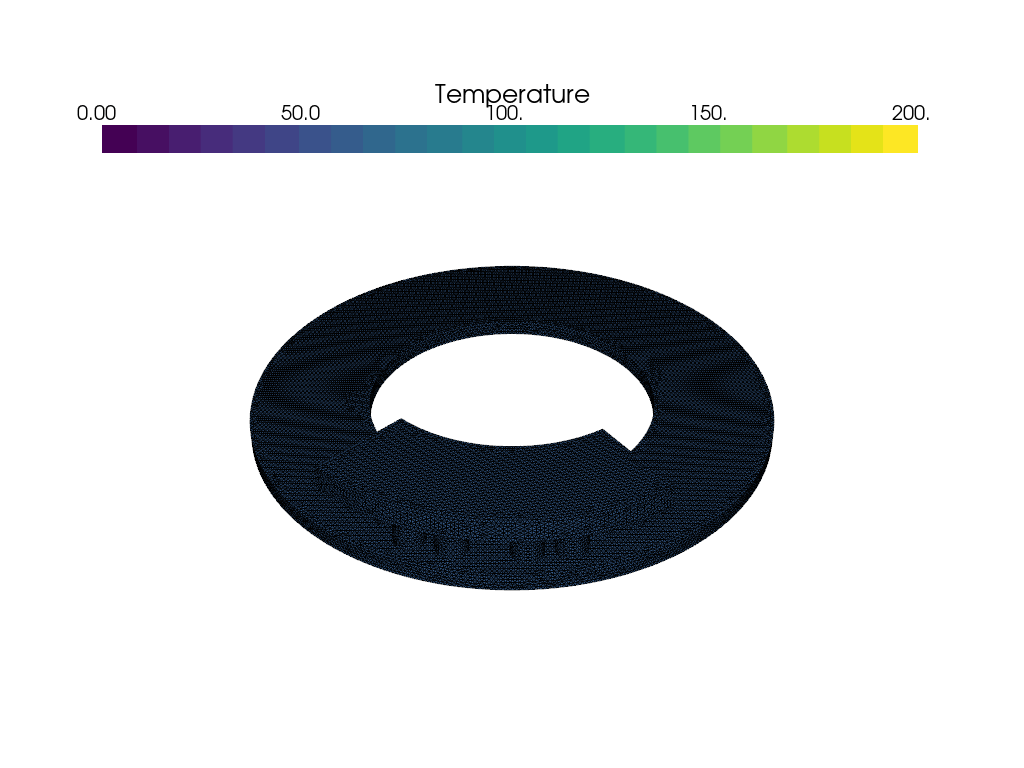

In [2]:
from IPython.display import display, Image
display(Image(gif_name))

# 2: New brake pad points, add boundary for rubbing elements

Info    : Reading 'm-3-5.msh'...
Info    : 168 entities
Info    : 57426 nodes
Info    : 271659 elements
Info    : Done reading 'm-3-5.msh'                                                                               
Volume:, Tag:31
Volume:, Tag:32
Info    : Meshing 1D...
Info    : Done meshing 1D (Wall 2.7312e-05s, CPU 3.7e-05s)
Info    : Meshing 2D...
Info    : Done meshing 2D (Wall 3.1799e-05s, CPU 0.000173s)
Info    : Meshing 3D...
Info    : Done meshing 3D (Wall 0.677023s, CPU 0.67796s)
Info    : Optimizing mesh...
Info    : Done optimizing mesh (Wall 0.00535155s, CPU 0.005671s)
Info    : 57426 nodes 271707 elements
Info    : Writing 'new_pad.msh'...
Info    : Done writing 'new_pad.msh'

New pad nodes is 17025.
Info    : Reading 'm-3-5.msh'...
Info    : 168 entities
Info    : 57426 nodes
Info    : 271659 elements
Info    : Done reading 'm-3-5.msh'                                                                               
Info    : Reading 'new_pad.msh'...
Info    : 168 entiti

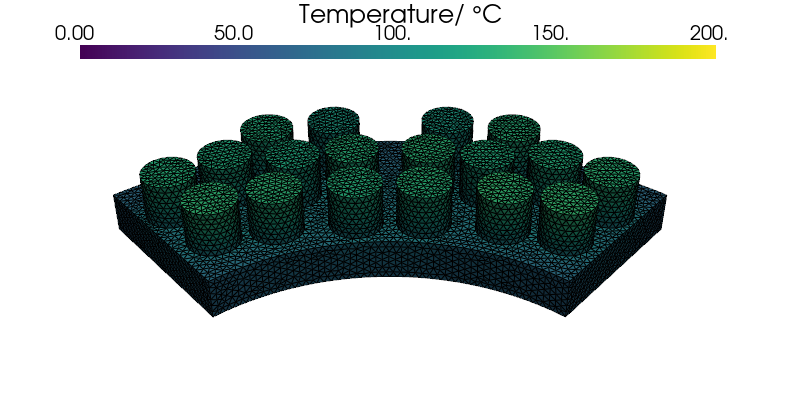

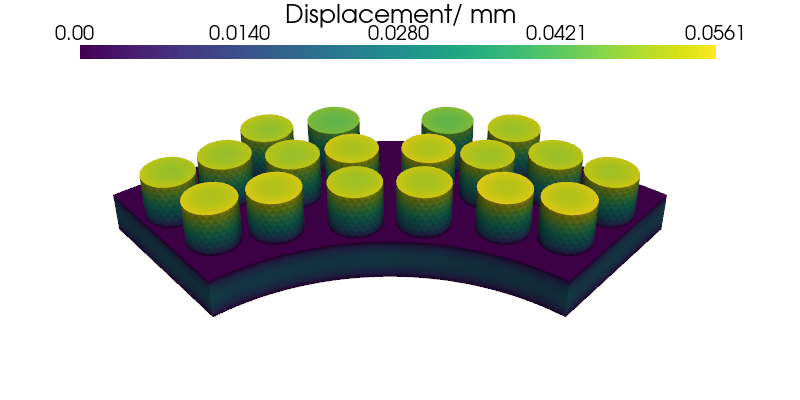

In [3]:
mesh_n_pad = mesh_del_disc(mesh_name1, "new_paddddd.msh")
print(f"New pad nodes is {len(meshio.read( mesh_n_pad ).points)}.")

T_new_p, pad_node_coordinates  = T_pad_transfer1( mesh_name1, mesh_n_pad, u_n, mesh_brake, pad_v_tag )

domain_pad, cell_mark_pad, facet_mark_pad = gmshio.read_from_msh( mesh_n_pad , MPI.COMM_WORLD, 0, gdim=3 )

plotter = plot_T_pad( domain_pad, T_new_p)
plotter.show()
#figure = plotter.screenshot("T_pad.png")


VT      = fem.functionspace(domain_pad, ("CG", 1))    #define the finite element function space
Delta_T = fem.Function(VT, name ="Temperature_variation")  # T_ is the test function, like v
for i in range(len(T_new_p)):
    Delta_T.vector.array[i] = T_new_p[i]

#######try to make domain only for brake pad.
E    = fem.Constant(domain_pad, 50e3)             # Elastic module
nu   = fem.Constant(domain_pad, 0.2)             # Poission ratio
gdim = domain_pad.geometry.dim

mu    = E / 2 / (1 + nu)                      # Shear modulus
lmbda = E * nu / (1 + nu) / (1 - 2 * nu)   # Lame parameters
alpha = fem.Constant(domain_pad, 1e-5)         # Thermal expansion coefficient
f1    = fem.Constant(domain_pad, (0.0, 0.0, 0.0))       # O for external force

def eps(v):                                # epsilon, strain, the deforamtion, dy/y 
    return ufl.sym(ufl.grad(v))
def sigma(v, Delta_T):                     # sigmathis is sigma
    return (lmbda * ufl.tr(eps(v)) - alpha * (3 * lmbda + 2 * mu) * Delta_T 
    ) * ufl.Identity(gdim)  + 2.0 * mu * eps(v)     # here braces is important, can not be in above line

Vu = fem.functionspace(domain_pad, ("CG", 1, (gdim,))) 
du = ufl.TrialFunction(Vu)
u_ = ufl.TestFunction(Vu)

Wint = ufl.inner(sigma(du, Delta_T), eps(u_)) * ufl.dx  # here du is unkown
aM   = ufl.lhs(Wint)                                      # Wint is long and lhs can help to distinguish unkown and know.
LM   = ufl.rhs(Wint) + ufl.inner(f1, u_) * ufl.dx         # knows parameters are in lhs

def up_side(x):
    return np.logical_or(np.isclose(x[2], 53), np.isclose(x[2], 83))

up_dofs_u = fem.locate_dofs_geometrical(Vu, up_side) # lateral sides of domain
bcu       = [fem.dirichletbc(np.zeros((gdim,)), up_dofs_u, Vu)]  # displacement Vu is fixed in lateral sides

u_d     = fem.Function(Vu, name="Displacement")
problem = fem.petsc.LinearProblem(aM, LM, u=u_d, bcs=bcu)
problem.solve()

plot_s_pad = plot_S_pad(Vu,u_d )
plot_s_pad.show()
figure = plot_s_pad.screenshot("T_pad.png")

# Check & Test

In [4]:
print("1, Old: ",len(pad_node_coordinates))
print("2, New: ",len(domain_pad.geometry.x))
print("3, Differences: \n")
array1 = domain_pad.geometry.x
array2 = pad_node_coordinates   
#c = compare_two_arrays(array1,array2)

1, Old:  17025
2, New:  17025
3, Differences: 

